Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

-----

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# <Step1. 탐색> : Winequality 데이터 살펴보기

### [Winequality 데이터셋의 기본 정보]

In [2]:
# Data Source : https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

red_path = "../data/winequality-red.csv"
white_path = "../data/winequality-white.csv"

red_df = pd.read_csv(red_path, sep=";")
white_df = pd.read_csv(white_path, sep=";")

In [3]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
print(red_df.shape)
print(white_df.shape)

(1599, 12)
(4898, 12)


-----

### [데이터 전처리]

##### 데이터 병합

In [6]:
# white = 1, red = 0
white_df['wine_kind'] = 1
red_df['wine_kind'] = 0

In [7]:
result_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol', 'quality', 'wine_kind']
df = pd.DataFrame(columns=result_col)
df = df.append(white_df)
df = df.append(red_df)
df['quality'] = df['quality'].astype('str')
df['wine_kind'] = df['wine_kind'].astype('int')
origin_df = df.copy()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_kind
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


-----

##### 피처 스케일링

In [8]:
pd.options.mode.chained_assignment = None

In [9]:
# 피처 각각에 대한 scaling을 수행합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)

In [10]:
scale_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                 'pH', 'sulphates', 'alcohol']
result = standard_scaling(df, scale_columns)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_kind
0,-0.166076,-0.423150,0.284664,3.206682,-0.314951,0.815503,0.959902,2.102052,-1.358944,-0.546136,-1.418449,6,1
1,-0.706019,-0.240931,0.147035,-0.807775,-0.200775,-0.931035,0.287595,-0.232314,0.506876,-0.277330,-0.831551,6,1
2,0.682405,-0.362411,0.559923,0.306184,-0.172231,-0.029596,-0.331634,0.134515,0.258100,-0.613338,-0.328496,6,1
3,-0.011807,-0.666110,0.009405,0.642474,0.056121,0.928182,1.242978,0.301255,-0.177258,-0.882144,-0.496181,6,1
4,-0.011807,-0.666110,0.009405,0.642474,0.056121,0.928182,1.242978,0.301255,-0.177258,-0.882144,-0.496181,6,1


-----

### [피처의 분포 탐색]

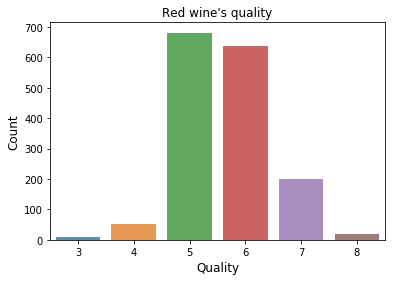

In [12]:
red_quality = df[df['wine_kind'] == 0]['quality'].value_counts().sort_index()

sns.barplot(red_quality.index, red_quality.values, alpha=0.8)
plt.title("Red wine's quality")
plt.ylabel("Count", fontsize=12)
plt.xlabel("Quality", fontsize=12)
plt.show()

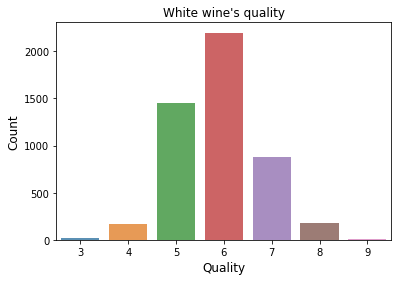

In [13]:
white_quality = df[df['wine_kind'] == 1]['quality'].value_counts().sort_index()

sns.barplot(white_quality.index, white_quality.values, alpha=0.8)
plt.title("White wine's quality")
plt.ylabel("Count", fontsize=12)
plt.xlabel("Quality", fontsize=12)
plt.show()

In [14]:
# 피처 각각에 대한 histogram을 그려줍니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(4, 4, i+1)
        result = plt.hist(df[df.columns[i]], bins=100)
        ax.set_title(df.columns[i])
    plt.show()

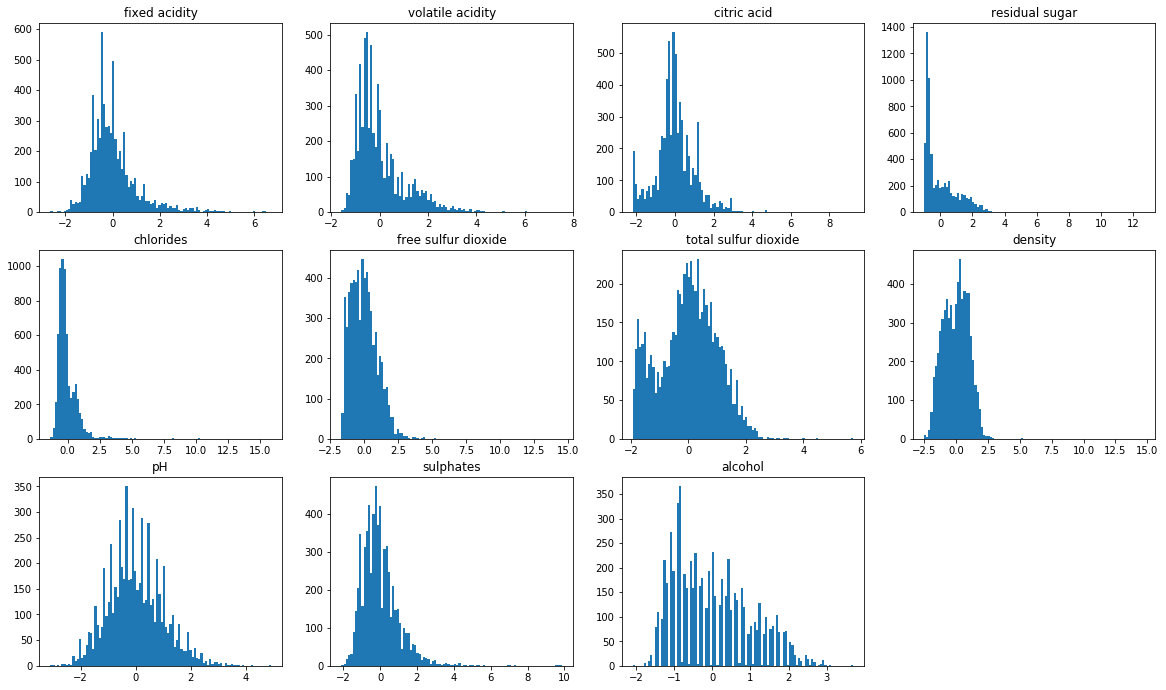

In [15]:
plot_hist_each_column(df[scale_columns])

-----

# <Step2. 이진 분류> : 화이트와인과 레드와인 분류하기

##### 모델링 프로세스
    - 훈련/테스트 데이터 분리
    - 훈련 데이터로 LogisticRegression 모델 학습
    - 테스트 데이터로 y값을 예측
    - 실제 y값과 예측된 y값을 비교하여 모델 평가

### [Logistic Regression]

In [16]:
# 훈련/테스트 데이터 분리
from sklearn.model_selection import train_test_split

x = df[scale_columns].values
y = df['wine_kind'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# 훈련 데이터로 LogisticRegression 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

# 테스트 데이터로 y값을 예측
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1] # wine_kind가 "1"인지에 대한 확률

# 실제 y값과 예측된 y값을 비교하여 모델 평가
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.99
Precision : 0.996
Recall : 0.997
F1 : 0.996


-----

##### 분류 모델의 여러가지 평가 방법들
- Confusion Matrix 기반
    - Accuracy
    - Precision
    - Recall
    - F1 score
    - AUC (Area Under the Curve) & ROC (Receiver Operating Characteristic) curve

In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[321   4]
 [  3 972]]


In [18]:
# AUC (Area Under the Curve) & ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print("AUC : %.3f" % roc_auc)

AUC : 0.994


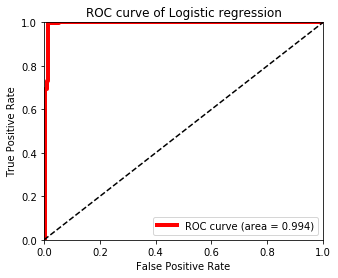

In [19]:
# ROC curve plot
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--') # 최하 기준선
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

-----

### [Decision Tree]

In [20]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)
y_pred_probability = dtc.predict_proba(x_test)[:,1] # wine_kind가 "1"인지에 대한 확률

print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision : %.3f" % precision_score(y_test, y_pred))
print("Recall : %.3f" % recall_score(y_test, y_pred))
print("F1 : %.3f" % f1_score(y_test, y_pred))

accuracy: 0.98
Precision : 0.991
Recall : 0.988
F1 : 0.989


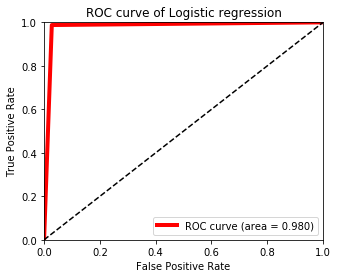

In [21]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)

plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve (area = %0.3f)' % roc_auc, 
         color='red', linewidth=4.0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc="lower right")

-----

##### 참고 : Decision Tree 모델의 시각화

- install graphviz
    - Mac
        - 1. brew install : 
            - `(env_name)$ /usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"`
        - 2. install graphviz :
            - `(env_name)$ brew install graphviz`
    - Windows
        - `(env_name)$ brew install graphviz`
        - 만약 실행되지 않는 경우 : 
            - 1. https://graphviz.gitlab.io/download/ 에서 graphviz 다운로드 & 설치
            - 2. Windows 환경변수 설정 : Path에 다음의 두 경로 추가
                - C:\Program Files (x86)\Graphviz2.38\bin
                - C:\Program Files (x86)\Graphviz2.38\bin\dot.exe
- install pydotplus
    - `(env_name)$ pip install pydotplus`

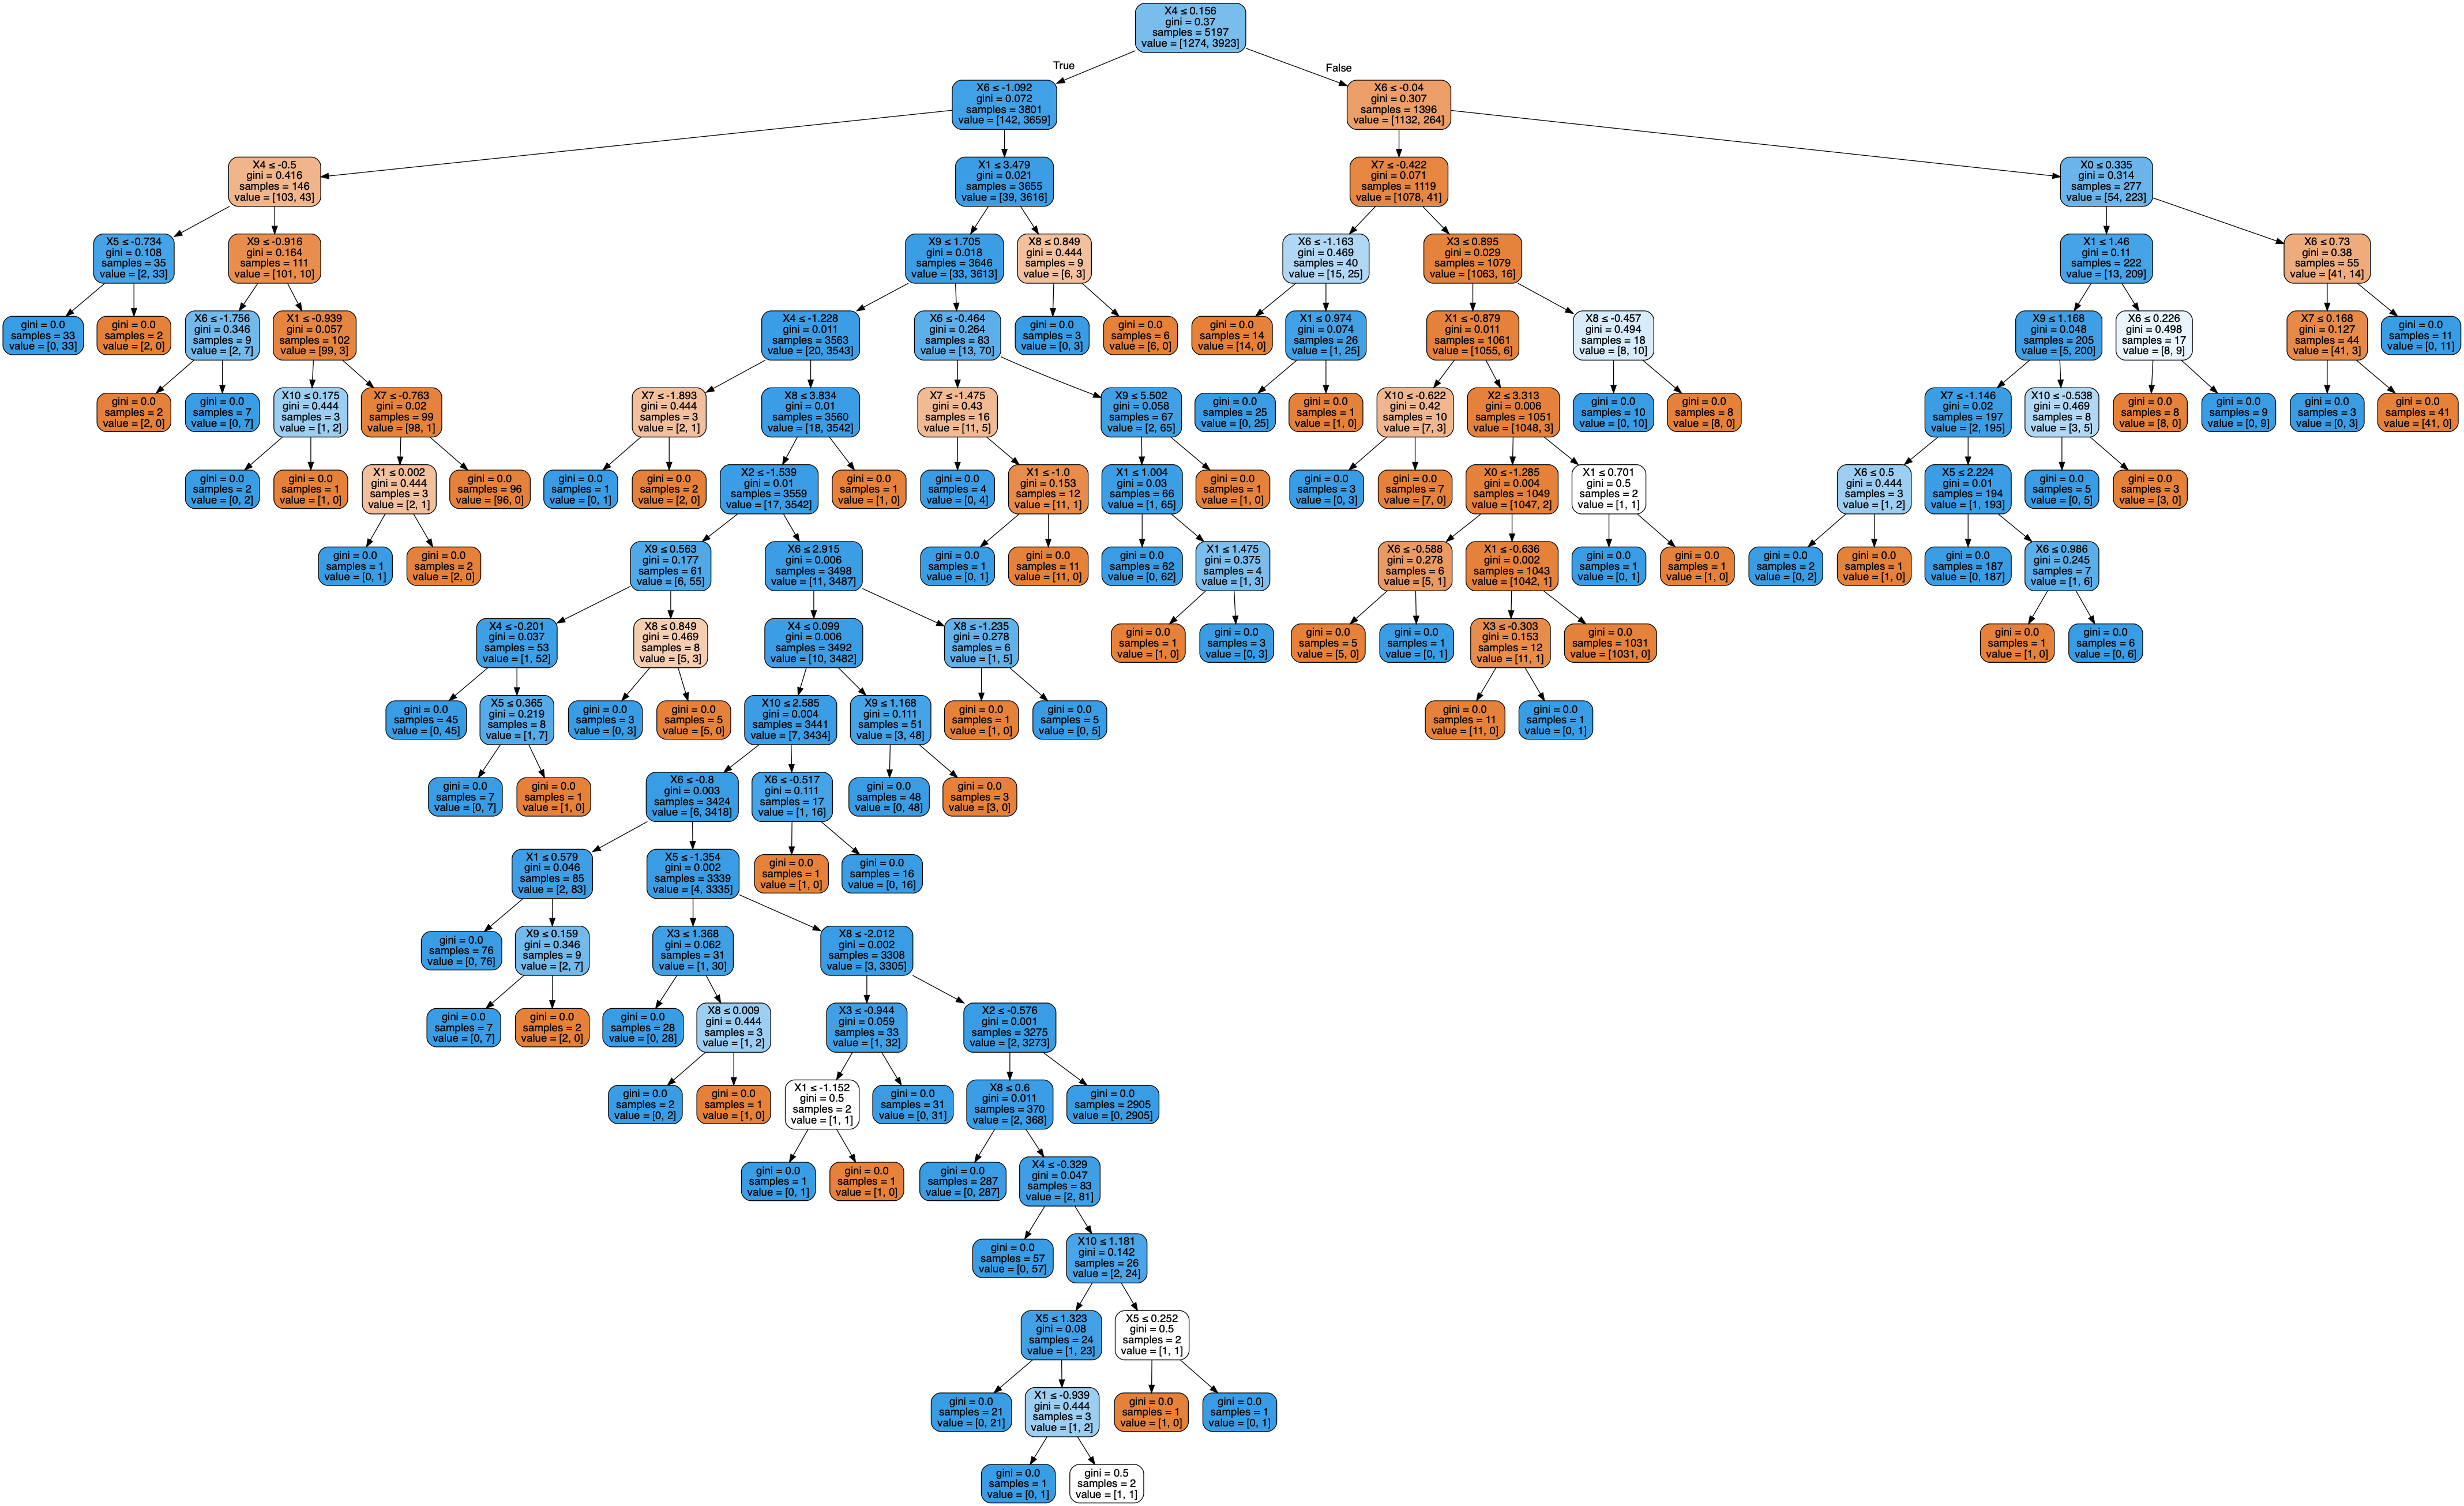

In [22]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(dtc, out_file=None, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

-----

# <Step3. 다항 분류> : 와인의 등급 분류하기

### [멀티 클래스 분류하기]

In [23]:
quality_columns = scale_columns.copy()
quality_columns.append("wine_kind")

In [24]:
x = df[quality_columns].values
y = df['quality'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test) # y를 3~9의 label로 예측하여 반환.
y_pred_encoded = dtc.predict_proba(x_test) # y를 3~9의 one-hot encoding 형태로 반환.

print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Misclassification samples : %d" %(y_test != y_pred).sum())

accuracy: 0.61
Misclassification samples : 505


In [26]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[  0   0   4   1   0   1]
 [  0  11  15  20   1   0]
 [  1  17 296 101  21   2]
 [  2   7  99 349  79  21]
 [  1   5  16  63 122   8]
 [  0   0   3   8   9  17]]


-----

### [멀티 클래스 분류 문제에서 AUC 구하기]

In [27]:
from sklearn.metrics import auc

n_class = 7

# one-hot encoding : numpy로 one-hot encoding 구현
y_test_encoded = np.zeros((y_test.shape[0], 7))
for idx, y_label in enumerate(y_test):
    y_test_encoded[idx][int(y_label)-3] = 1

# 각각의 클래스에 대해 AUC를 계산
for i in range(7):
    fpr, tpr, _ = roc_curve(y_test_encoded[:, i], y_pred_encoded[:, i])
    roc_auc = str(auc(fpr, tpr))
    if roc_auc == "nan":
        print("label", str(i+3), "have not enough data")
    else:
        print("label", str(i+3), "auc :", roc_auc)

label 3 auc : 0.49845440494590415
label 4 auc : 0.6054490499397192
label 5 auc : 0.7584331860704108
label 6 auc : 0.6834065883615118
label 7 auc : 0.7330296859929267
label 8 auc : 0.7170614795317882
label 9 have not enough data


-----

### [순위가 있는 클래스의 또다른 분류 방법]

In [28]:
from sklearn import linear_model

x = df[quality_columns].values
df['quality'] = df['quality'].astype(int)
y = df['quality'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train) # 모델 학습

In [29]:
print(model.score(x_train, y_train)) # train R2 score
print(model.score(x_test, y_test)) # test R2 score

0.2936590587084561
0.30408617296966434


In [30]:
y_pred = lr.predict(x_test)
y_pred = np.rint(y_pred) # regression의 결과값인 y_pred를 클래스로 만들기 위한 반올림

In [31]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print(confmat)

accuracy: 0.54
[[  0   1   3   1   1   0]
 [  0   1  26  18   2   0]
 [  0   0 226 210   1   1]
 [  0   0  92 422  43   0]
 [  0   0   6 158  51   0]
 [  0   0   0  23  14   0]]


-----

# <Step4. 심화> : 더 나은 결과를 위한 방법들

### [피처 분포 정규화]

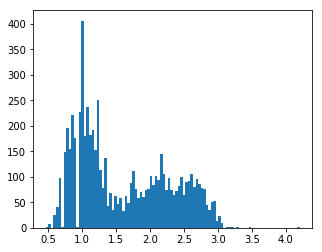

In [32]:
plt.rcParams['figure.figsize'] = [5, 4]
residual_sugar = origin_df['residual sugar'].apply(lambda x: math.log1p(x))
fig = plt.hist(residual_sugar, bins=100)

In [33]:
new_df = origin_df.copy()
new_df['residual sugar'] = new_df['residual sugar'].apply(lambda x: math.log1p(x))
result = standard_scaling(new_df, scale_columns)

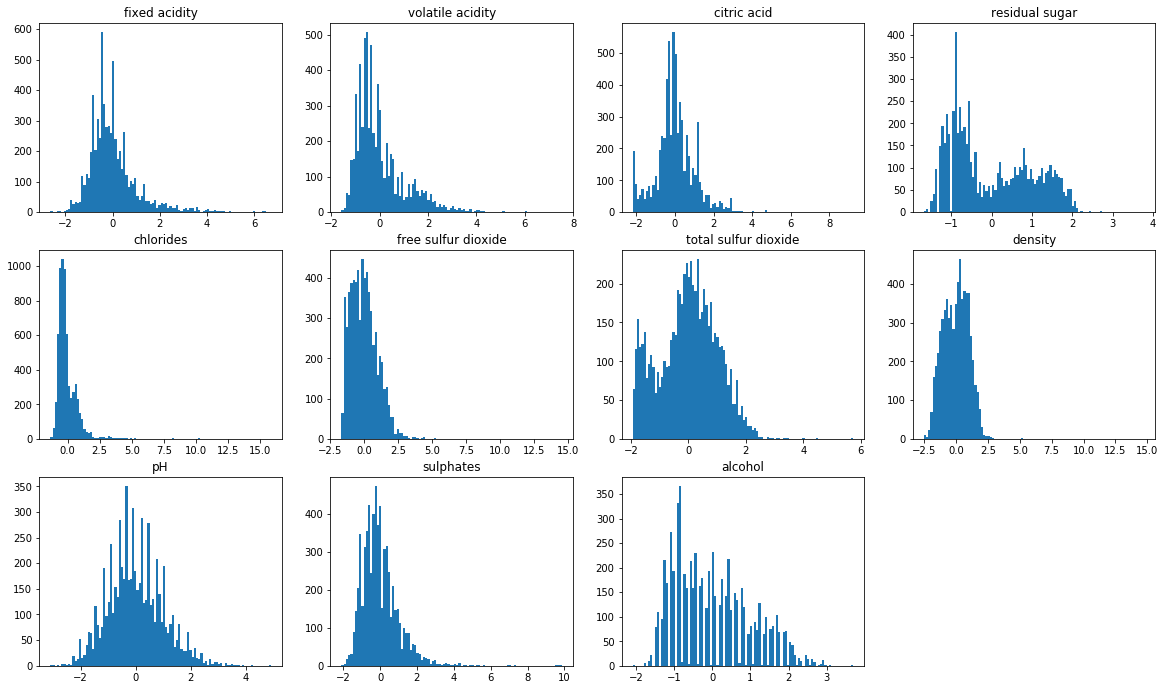

In [34]:
plot_hist_each_column(new_df[scale_columns])

-----

##### 성능 재확인

In [35]:
x = new_df[quality_columns].values
y = new_df['quality'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [36]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [37]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Misclassification samples : %d" %(y_test != y_pred).sum())
print(confmat)

accuracy: 0.61
Misclassification samples : 503
[[  0   0   4   1   0   1]
 [  0  11  15  20   1   0]
 [  1  17 296 101  21   2]
 [  2   7  98 351  78  21]
 [  1   5  16  63 122   8]
 [  0   0   3   8   9  17]]


-----

### [더 좋은 알고리즘 사용하기]

##### Better algorithms
- Random Forest
- Support Vector Machine
- KNN (K-Nearest Neighbor Algorithm)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_rfc = rfc.predict(x_test)

svc = SVC(gamma=2, C=1)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

knn = KNeighborsClassifier(1)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [39]:
print("Random Forest's accuracy: %.2f" % accuracy_score(y_test, y_pred_rfc))
print("Support Vector Machine's accuracy: %.2f" % accuracy_score(y_test, y_pred_svc))
print("KNN's accuracy: %.2f" % accuracy_score(y_test, y_pred_knn))

Random Forest's accuracy: 0.65
Support Vector Machine's accuracy: 0.66
KNN's accuracy: 0.64
